<a href="https://colab.research.google.com/github/NancyMerciline/House-Pricing-Prediction-California/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

housing_pd = pd.read_csv('housing.csv')
housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
c=housing_pd.columns
c

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing_pd.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing_pd.tail().T

,20635,20636,20637,20638,20639
longitude,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,39.48,39.49,39.43,39.43,39.37
housing_median_age,25.0,18.0,17.0,18.0,16.0
total_rooms,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,374.0,150.0,485.0,409.0,616.0
population,845.0,356.0,1007.0,741.0,1387.0
households,330.0,114.0,433.0,349.0,530.0
median_income,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,INLAND,INLAND,INLAND,INLAND,INLAND


In [ ]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [ ]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [ ]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [ ]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [ ]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',	
                                     'housing_median_age',	'total_rooms',	
                                     'total_bedrooms',	'population',	
                                     'households',	'median_income',	
                                     '<1H OCEAN',	
                                     'INLAND',	'ISLAND',	
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


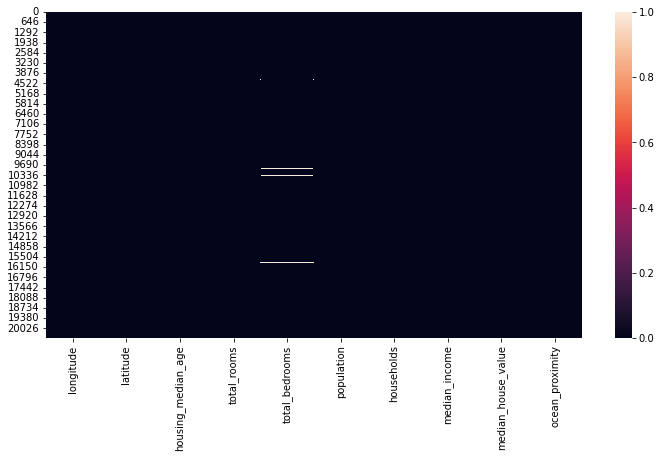

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(housing_pd.isnull())
plt.show()

In [ ]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

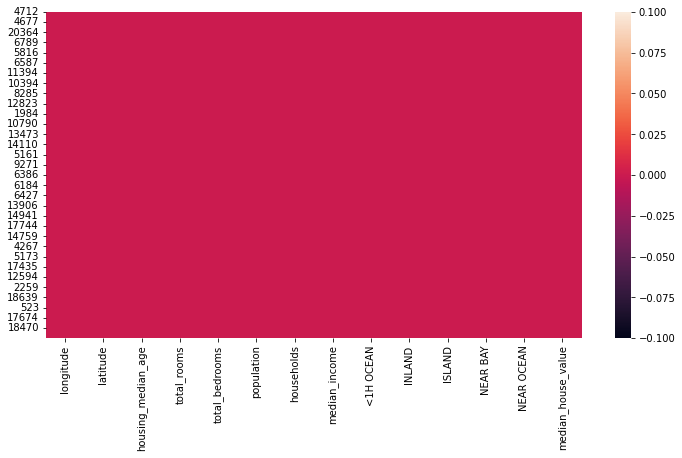

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(housing_pd_final.isnull())
plt.show()

## Correlation between train attributes

In [ ]:
train_corr = housing_pd_final.select_dtypes(include=[np.number])

In [ ]:
train_corr.shape

(20433, 14)

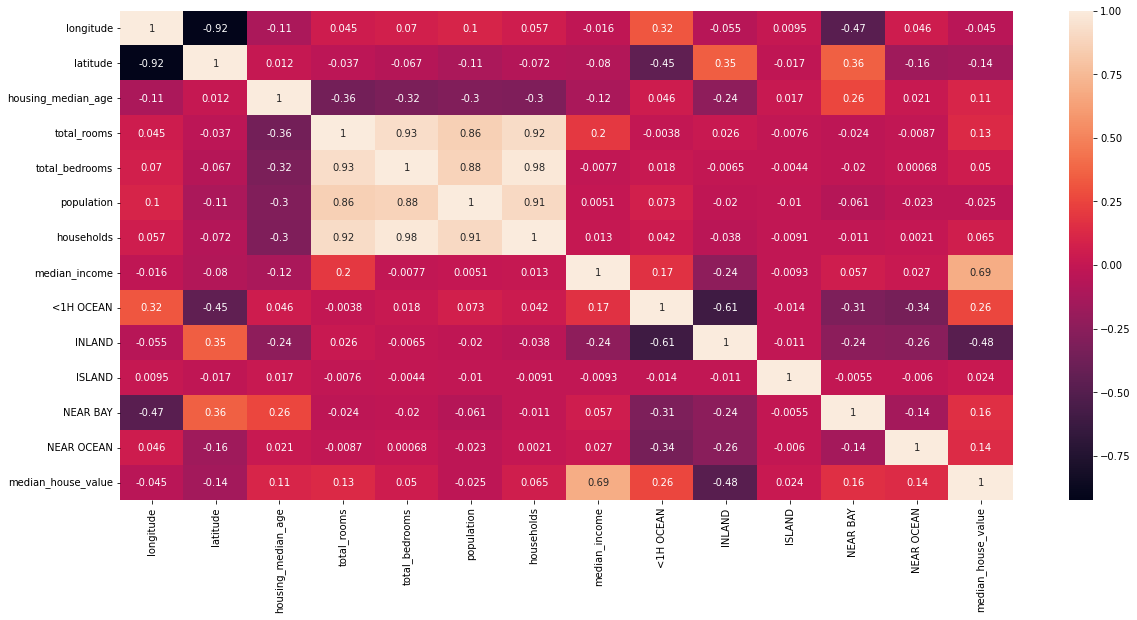

In [ ]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

In [ ]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [ ]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train_preprocessed, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [ ]:
pd.DataFrame(X_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0


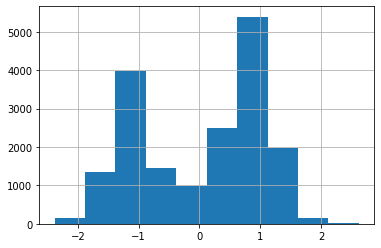

In [ ]:
pd.DataFrame(X_train_preprocessed)[0].hist()

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train , y_train)

RandomForestRegressor()

In [ ]:
random_forest = model.score(X_train, y_train)*100
print("Random forest Accuracy --> ", random_forest )

Random forest Accuracy -->  97.55349303893685


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [ ]:
linear = model.score(X_train, y_train)*100
print("Linear Accuracy --> ", linear)

Linear Accuracy -->  64.63923971862778


## Model Evaluation

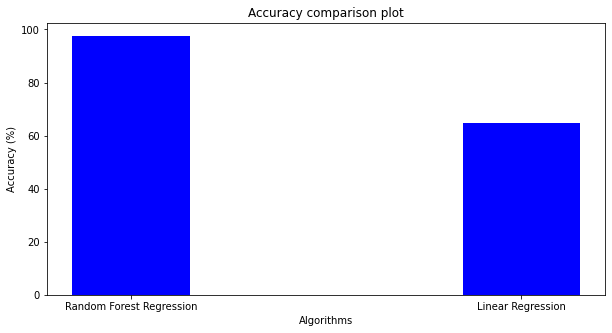

In [ ]:
# creating the dataset
data = {'Random Forest Regression': random_forest,
        'Linear Regression': linear }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.3)
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy comparison plot")
plt.show()